# Endometriosis - PLOTS
# Cells - all datasets

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = 'figures/DEGs/'

sys.executable

'/home/jovyan/my-conda-envs/sc_analysis/bin/python'

# Read in dataset

In [2]:
path2data = '/nfs/team292/lg18/endometriosis/integrated_objects/'
adata = sc.read(path2data + 'cells_integrated.h5ad')
adata.X.shape

(390867, 17736)

### Import EPITHELIAL, MESENCHYMAL and ENDOTHELIAL annotations

In [3]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium.csv',index_col=0)
annot_all = annot_df['Mareckova_celltype'].to_dict()
annot = dict(annot_all)
adata.obs['Mareckova_celltype'] = adata.obs_names.map(annot)
print(adata.obs['Mareckova_celltype'].value_counts())

annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_epithelial_CLEAN.csv',index_col=0)
annot_df.at[annot_df['Mareckova_epi_celltype'] == 'Hormones', 'Mareckova_epi_celltype'] = 'eHormones'
annot_df.at[annot_df['Mareckova_epi_celltype'] == 'Hormones_secretory', 'Mareckova_epi_celltype'] = 'eHormones'
annot_df.head()
annot1 = annot_df['Mareckova_epi_celltype'].to_dict()
annot.update(annot1)


annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_mesenchymal_CLEAN.csv',index_col=0)
annot_df.at[annot_df['Mareckova_mesen_celltype'] == 'Hormones', 'Mareckova_mesen_celltype'] = 'sHormones'
annot_df.head()
annot2 = annot_df['Mareckova_mesen_celltype'].to_dict()
annot.update(annot2)

annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_endothelial.csv',index_col=0)
annot_df.head()
annot2 = annot_df['Mareckova_endo_celltype'].to_dict()
annot.update(annot2)



annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_immune.csv',index_col=0)
annot_df.head()
annot2 = annot_df['immune_subcluster_labels'].to_dict()
annot.update(annot2)


adata.obs['celltype'] = adata.obs_names.map(annot)
print(adata.obs['celltype'].value_counts())

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,39,40,41,42,46,47,55,56,58,59,60,62,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Mesen_dStromal          96529
Mesen_eStromal          79488
Immune_Lymphoid         34456
Epi_SOX9                32015
Epi_Glandular           27887
Endothelial             23519
Epi_preGlandular        16765
Epi_Luminal             14253
Epi_Horm                11490
Mesen_ePV               11325
Immune_Myeloid          11260
LowQC                    7549
Epi_Ciliated             7467
Doublet                  5616
Mesen_mPV                4618
Mesen_uSMCs              2995
Epi_endocervix_MUC5B     1748
Epi_Glands                952
Mesen_FibBasalis          539
Epi_cervix_KRT5           396
Name: Mareckova_celltype, dtype: int64


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (15,19,21,22,23,24,25,39,40,41,46,47,60,61,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (13,15,17,18,19,21,22,23,24,25,41,42,46,55,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


eStromal           55612
dStromal_mid       43790
Mesen_dStromal     22381
dStromal_early     16804
Venous             15494
                   ...  
cDC1                 188
dHormones            172
Plasma_B_Cell         89
Red_Blood_Cell        43
Epi_cervix_KRT5       23
Name: celltype, Length: 74, dtype: int64


In [4]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium.csv',index_col=0)
annot = annot_df['Mareckova_lineage'].to_dict()


adata.obs['Mareckova_lineage'] = adata.obs_names.map(annot)
print(adata.obs['Mareckova_lineage'].value_counts())

Mesen          195494
Epi            112973
Immune          45716
Endothelial     23519
LowQC            7549
Doublet          5616
Name: Mareckova_lineage, dtype: int64


### Remove lowQC and doublets

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Mareckova_celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Mareckova_lineage' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


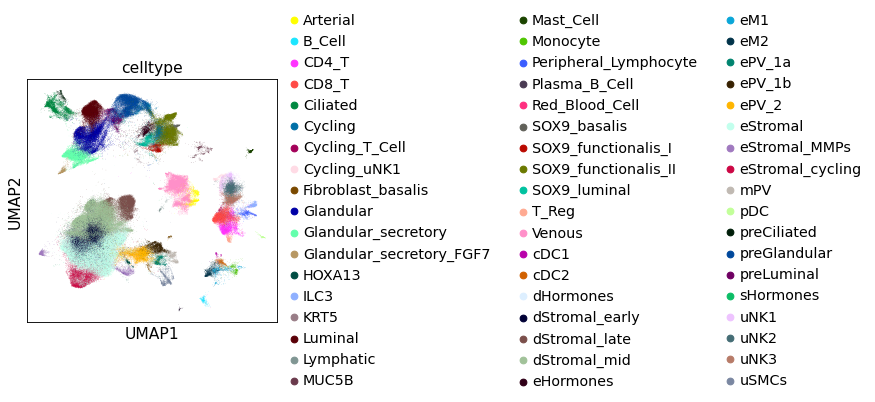

In [5]:
adata = adata[[ i not in ['Doublet', 'LowQC', 'Other'] for i in adata.obs['celltype'] ]]
adata = adata[[ 'Epi_' not in i for i in adata.obs['celltype'] ]]
adata = adata[[ 'Mesen_' not in i for i in adata.obs['celltype'] ]]
adata = adata[[ 'Immune' not in i for i in adata.obs['celltype'] ]]
adata = adata[[ 'Hormones' not in i for i in adata.obs['Binary Stage'] ]]
sc.pl.umap(adata, color=['celltype'])

## Normalise

In [6]:
sc.pp.filter_genes(adata, min_cells = 5) # custom so that you don;t lose your gene
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:08): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
adata.X.shape

(256408, 17736)

In [8]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


# DEGs within Immune

In [9]:
adataDown = adata[["Immune" in i for i in adata.obs.Mareckova_lineage ]]
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown = adataDown[[ 'Cycling' not in i for i in adataDown.obs.celltype ]]
adataDown = adataDown[[ 'Red_Blood_Cell' not in i for i in adataDown.obs.celltype ]]  
adataDown.obs['celltype'].value_counts()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


CD8_T                    5221
uNK2                     4213
CD4_T                    3835
uNK3                     3157
uNK1                     1318
eM2                      1042
Peripheral_Lymphocyte     903
ILC3                      796
eM1                       762
T_Reg                     600
cDC2                      537
Monocyte                  467
Mast_Cell                 446
B_Cell                    343
pDC                       209
cDC1                      115
Plasma_B_Cell              81
Name: celltype, dtype: int64

In [10]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)


### Downsample to the smallest pop size
target_cells = 200

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

filtered out 19409 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 1858 genes that are detected in less than 5 cells
filtered out 1676 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


uNK3                     200
uNK1                     200
ILC3                     200
Monocyte                 200
uNK2                     200
CD4_T                    200
cDC2                     200
eM1                      200
eM2                      200
CD8_T                    196
Mast_Cell                161
pDC                      142
cDC1                      79
Peripheral_Lymphocyte     66
T_Reg                     51
B_Cell                    30
Plasma_B_Cell             26
Name: celltype, dtype: int64


In [11]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [12]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 14202 2551 
metadata(0):
assays(1): X
rownames(14202): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(2551): HCA_A_RepT_RNA13247830_AACTTTCCAGTAACGG-Mareckova
  HCA_A_RepT_RNA13247830_AATCCAGTCATCTGCC-Mareckova ...
  GSM5572240_TTTCATGCAATTTCTC-Lai GSM5572240_TTTGATCAGTGTAGAT-Lai
colData names(59): library StudyName ... Mareckova_lineage cell
reducedDimNames(0):
altExpNames(0):


In [13]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [14]:
DEGs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
VPREB3,0.000000e+00,2.053047,0.733,0.003,0.000000e+00,B_Cell,VPREB3
PAX5,1.689819e-285,1.225766,0.600,0.001,2.399882e-281,B_Cell,PAX5
MS4A1,9.336961e-240,3.436603,0.967,0.015,1.326035e-235,B_Cell,MS4A1
TNFRSF13C,6.957436e-179,1.751628,0.733,0.011,9.880950e-175,B_Cell,TNFRSF13C
CD79A,1.572405e-133,3.276182,0.933,0.033,2.233129e-129,B_Cell,CD79A
...,...,...,...,...,...,...,...
RCN27,9.972549e-01,0.030383,0.370,0.405,1.000000e+00,uNK3,RCN2
NPM38,9.976179e-01,0.054557,0.125,0.131,1.000000e+00,uNK3,NPM3
UBR38,9.985260e-01,0.028227,0.160,0.168,1.000000e+00,uNK3,UBR3
DPY306,9.990516e-01,0.041843,0.365,0.399,1.000000e+00,uNK3,DPY30


In [15]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/immune_DEGs.tsv', index=False, sep='\t')

# DEGs within ENDOTHELIAL

In [16]:
endothelials = ['Arterial',
'Venous',
'Lymphatic']

In [17]:
adataDown = adata[[ "Endo" in i for i in adata.obs.Mareckova_lineage ]]
adataDown = adataDown[[ i in endothelials for i in adataDown.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Venous       10686
Arterial      1446
Lymphatic      132
Name: celltype, dtype: int64

In [18]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)

### Downsample to the smallest pop size
target_cells = 500

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

filtered out 3284 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 921 genes that are detected in less than 5 cells
filtered out 3514 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


Arterial     500
Venous       500
Lymphatic     77
Name: celltype, dtype: int64


In [19]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [20]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 13301 1077 
metadata(0):
assays(1): X
rownames(13301): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(1077): HCA_A_RepT_RNA13247830_AAACGGGGTAAATGTG-Mareckova
  HCA_A_RepT_RNA13247830_AAAGATGAGCTGATAA-Mareckova ...
  GSM5572240_TACATTCTCCGGCAGT-Lai GSM5572240_TAGGTTGAGTCATGGG-Lai
colData names(59): library StudyName ... Mareckova_lineage cell
reducedDimNames(0):
altExpNames(0):


In [21]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [22]:
DEGs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
SRP14,8.720508e-125,1.989842,1.000,0.997,1.159915e-120,Arterial,SRP14
GJA4,1.566498e-123,2.110800,0.824,0.097,2.083600e-119,Arterial,GJA4
EFNB2,1.443966e-113,1.860359,0.910,0.333,1.920619e-109,Arterial,EFNB2
SEMA3G,8.033439e-102,1.472171,0.638,0.026,1.068528e-97,Arterial,SEMA3G
ADAMTS6,5.719583e-99,1.746688,0.788,0.180,7.607617e-95,Arterial,ADAMTS6
...,...,...,...,...,...,...,...
RBBP71,9.955747e-01,0.001813,0.438,0.425,1.000000e+00,Venous,RBBP7
TCAF11,9.963100e-01,0.000601,0.460,0.442,1.000000e+00,Venous,TCAF1
NME41,9.973120e-01,0.005705,0.582,0.577,1.000000e+00,Venous,NME4
PEX141,9.980303e-01,0.003109,0.136,0.137,1.000000e+00,Venous,PEX14


In [24]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/endothelial_DEGs.tsv', index=False, sep='\t')

# DEGs within EPITHELIALS

In [ ]:
epithelials = ['preCiliated',
'SOX9_basalis',
'SOX9_functionalis_I',
'SOX9_functionalis_II',
'SOX9_luminal',
'SOX9_basalis',
'Ciliated',
'preGlandular',
'preLuminal',
'Glandular',
'Luminal',
'Glandular_secretory',
'Glandular_secretory_FGF7']

In [ ]:
adataDown = adata[[ "Epi" in i for i in adata.obs.Mareckova_lineage ]]
adataDown = adataDown[[ i in epithelials for i in adataDown.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

In [ ]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)

### Downsample to the smallest pop size
target_cells = 500

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

In [ ]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [ ]:
%%R -i adataDown
adataDown

In [ ]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [ ]:
DEGs

In [ ]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/epithelial_DEGs.tsv', index=False, sep='\t')

In [ ]:
# topgenes_DEGs = dict(zip(topgenes_DEGs.names, map(list,list(topgenes_DEGs)))) # this is to convert into a dictionary for plotting
# for i in topgenes_DEGs.keys():
#     topgenes_DEGs[i] = [value for value in topgenes_DEGs[i] if value in adata.var_names] 
    

    
# sc.pl.dotplot(adata, topgenes_DEGs, groupby='celltype', standard_scale = 'var')

# DEGs within MESENCHYMALs

In [ ]:
mesenchymal = ['ePV_2',
'eStromal',
'eStromal_MMPs',
'ePV_1a',
'ePV_1b',
'Fibroblast_basalis',
'dStromal_early',
'dStromal_mid',
'dStromal_late'
]

In [ ]:
adataDown = adata[[ i in mesenchymal for i in adata.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

In [ ]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)


### Downsample to the smallest pop size
target_cells = 1000

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

In [ ]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [ ]:
%%R -i adataDown
adataDown

In [ ]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [ ]:
DEGs

In [ ]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/mesenchymal_DEGs.tsv', index=False, sep='\t')

In [ ]:
# topgenes_DEGs = dict(zip(topgenes_DEGs.names, map(list,list(topgenes_DEGs)))) # this is to convert into a dictionary for plotting
# for i in topgenes_DEGs.keys():
#     topgenes_DEGs[i] = [value for value in topgenes_DEGs[i] if value in adata.var_names] 
    

    
# sc.pl.dotplot(adata, topgenes_DEGs, groupby='celltype', standard_scale = 'var')

In [ ]:
sDEGs = DEGs[ DEGs.p_val_adj < 0.05 ]
sDEGs = sDEGs[ sDEGs.avg_log2FC > 1 ]
sDEGs = sDEGs[ sDEGs['pct.2'] < 0.5 ]
sDEGs.cluster.value_counts()

In [ ]:
sDEGs[ ['dStromal' in i for i in sDEGs.cluster] ]

In [ ]:
sc.pl.dotplot( adata[[ 'Mesen' in i for i in adata.obs.Mareckova_lineage ]] , sDEGs[ ['dStromal' in i for i in sDEGs.cluster] ].gene, groupby='celltype', standard_scale='var')

# DEGs within STROMAL

In [ ]:
mesenchymal = [
    'eStromal',
    'eStromal_MMPs',
    'dStromal_early',
    'dStromal_mid',
    'dStromal_late'
]

In [ ]:
adataDown = adata[[ i in mesenchymal for i in adata.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

In [ ]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)


### Downsample to the smallest pop size
target_cells = 2000

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

In [ ]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [ ]:
%%R -i adataDown
adataDown

In [ ]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [ ]:
DEGs

In [ ]:
DEGs.to_csv('DEGs/dStromalMid_vs_dStromalLate.tsv', index=False, sep='\t')
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/stromal_DEGs.tsv', index=False, sep='\t')

In [ ]:
# topgenes_DEGs = dict(zip(topgenes_DEGs.names, map(list,list(topgenes_DEGs)))) # this is to convert into a dictionary for plotting
# for i in topgenes_DEGs.keys():
#     topgenes_DEGs[i] = [value for value in topgenes_DEGs[i] if value in adata.var_names] 
    

    
# sc.pl.dotplot(adata, topgenes_DEGs, groupby='celltype', standard_scale = 'var')

In [ ]:
sDEGs = DEGs[ DEGs.p_val_adj < 0.05 ]
sDEGs = sDEGs[ sDEGs.avg_log2FC > 0.75 ]
sDEGs = sDEGs[ sDEGs['pct.2'] < 0.5 ]
sDEGs.cluster.value_counts()

In [ ]:
sDEGs[ ['dStromal_late' in i for i in sDEGs.cluster] ]

In [ ]:
sc.pl.dotplot( adata[[ 'Stromal' in i for i in adata.obs.celltype ]] , sDEGs[ ['dStromal_late' in i for i in sDEGs.cluster] ].gene, groupby='celltype', standard_scale='var')